# TripAdvisor Hotel Review - Sentiment Analysis

>by: damarsa
>>source of dataset: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("hotel_reviews.csv")
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [4]:
df.describe().round(2)

,Rating
count,20491.00
mean,3.95
std,1.23
min,1.00
25%,3.00
50%,4.00
75%,5.00
max,5.00


In [5]:
duplicates = df.duplicated().sum()
print(f'Dupilacate data(s) : {duplicates} data')

Dupilacate data(s) : 0 data


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

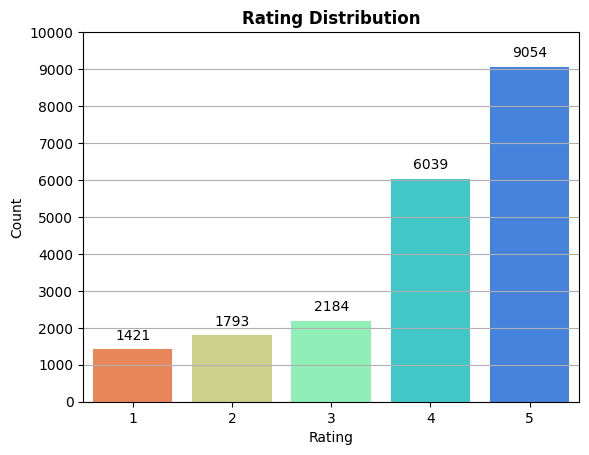

In [7]:
plt.figure()
ax = sns.countplot(x='Rating', data=df, palette='rainbow_r')
ax.set_yticks(range(0, df['Rating'].value_counts().max()+1000, 1000))
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Rating Distribution', fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [8]:
def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    if rating == 3:
        return 'neutral'
    if rating >= 4:
        return 'positive'

df['Sentiment'] = df['Rating'].apply(label_sentiment)
df

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,positive
1,ok nothing special charge diamond member hilto...,2,negative
2,nice rooms not 4* experience hotel monaco seat...,3,neutral
3,"unique, great stay, wonderful time hotel monac...",5,positive
4,"great stay great stay, went seahawk game aweso...",5,positive
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,positive
20487,great location price view hotel great quick pl...,4,positive
20488,"ok just looks nice modern outside, desk staff ...",2,negative
20489,hotel theft ruined vacation hotel opened sept ...,1,negative


In [9]:
df['Sentiment'].value_counts()

Sentiment
positive    15093
negative     3214
neutral      2184
Name: count, dtype: int64

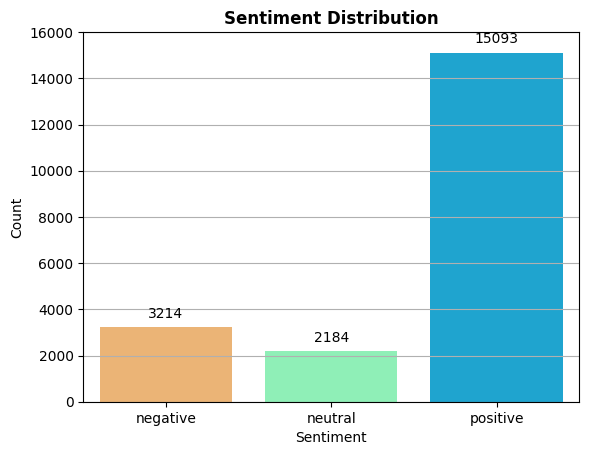

In [10]:
plt.figure()
ax = sns.countplot(x='Sentiment', data=df, palette='rainbow_r', order=['negative', 'neutral', 'positive'])
ax.set_yticks(range(0, df['Sentiment'].value_counts().max()+2000, 2000))
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Sentiment Distribution', fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [11]:
def sentiment_map(sentiment):
    if sentiment == 'negative':
        return 0
    if sentiment == 'neutral':
        return 1
    if sentiment == 'positive':
        return 2

df['Sentiment'] = df['Sentiment'].apply(sentiment_map)
df

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,2
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,2
4,"great stay great stay, went seahawk game aweso...",5,2
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,2
20487,great location price view hotel great quick pl...,4,2
20488,"ok just looks nice modern outside, desk staff ...",2,0
20489,hotel theft ruined vacation hotel opened sept ...,1,0


### Text Cleansing

In [12]:
import re
import contractions
import inflect
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
p = inflect.engine()

In [15]:
def text_clean(text):
    text = text.lower()
    text = contractions.fix(text)
    text = ' '.join([p.number_to_words(word) if word.isdigit() else word for word in text.split()])
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df['Review_Clean'] = df['Review'].apply(text_clean)
df

,Review,Rating,Sentiment,Review_Clean
0,nice hotel expensive parking got good deal sta...,4,2,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,1,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,2,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,2,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,2,best kept secret rd time staying charm star ca...
20487,great location price view hotel great quick pl...,4,2,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,0,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,1,0,hotel theft ruined vacation hotel opened sept ...


#### Word Count

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
neg_reviews = df[df['Sentiment'] == 0]
neu_reviews = df[df['Sentiment'] == 1]
pos_reviews = df[df['Sentiment'] == 2]

neg_text = ' '.join(neg_reviews['Review_Clean'].tolist())
neu_text = ' '.join(neu_reviews['Review_Clean'].tolist())
pos_text = ' '.join(pos_reviews['Review_Clean'].tolist())

In [18]:
vectorizer = CountVectorizer().fit([neg_text, neu_text, pos_text])

neg_freq = pd.DataFrame(vectorizer.transform([neg_text]).toarray(), columns=vectorizer.get_feature_names_out()).T
neu_freq = pd.DataFrame(vectorizer.transform([neu_text]).toarray(), columns=vectorizer.get_feature_names_out()).T
pos_freq = pd.DataFrame(vectorizer.transform([pos_text]).toarray(), columns=vectorizer.get_feature_names_out()).T

neg_freq.columns = ['Negative']
neu_freq.columns = ['Neutral']
pos_freq.columns = ['Positive']

In [19]:
freq_df = neg_freq.join([neu_freq, pos_freq]).sort_values(by='Positive', ascending=False)

print("Top 25 words for Negative Sentiment:")
print(neg_freq.sort_values(by='Negative', ascending=False).head(25))

Top 25 words for Negative Sentiment:
            Negative
room            9809
hotel           8500
nt              4036
day             2757
night           2709
stay            2614
time            2266
staff           2261
service         2177
good            2113
resort          1808
food            1728
like            1724
beach           1571
bed             1550
place           1529
stayed          1500
got             1473
nice            1420
told            1399
people          1397
desk            1379
two             1335
restaurant      1298
great           1229


In [20]:
print("Top 25 words for Neutral Sentiment:")
print(neu_freq.sort_values(by='Neutral', ascending=False).head(25))

Top 25 words for Neutral Sentiment:
            Neutral
room           5930
hotel          5518
nt             2592
good           2467
great          1754
night          1752
nice           1747
day            1490
staff          1481
location       1436
stay           1433
time           1429
beach          1319
resort         1222
food           1195
service        1167
clean          1159
like           1136
restaurant     1133
stayed         1101
pool           1099
place          1041
breakfast      1035
small           947
area            947


In [21]:
print("Top 25 words for Positive Sentiment:")
print(pos_freq.sort_values(by='Positive', ascending=False).head(25))

Top 25 words for Positive Sentiment:
            Positive
hotel          38938
room           30639
great          18115
staff          12538
good           12475
nt             12379
stay           11294
night           9623
nice            9245
time            8916
location        8856
day             8715
stayed          7868
restaurant      7661
breakfast       7552
clean           7307
service         7194
beach           7157
place           6811
food            6336
pool            5911
resort          5898
really          5701
friendly        5578
excellent       5392


In [22]:
def get_top_n_grams(corpus, ngram_range=(4,4), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Generate quadgrams for each sentiment
top_quadgrams_negative = get_top_n_grams(neg_reviews['Review_Clean'], ngram_range=(4,4), n=25)
top_quadgrams_neutral = get_top_n_grams(neu_reviews['Review_Clean'], ngram_range=(4,4), n=25)
top_quadgrams_positive = get_top_n_grams(pos_reviews['Review_Clean'], ngram_range=(4,4), n=25)

# Print the results
print("Top 25 Quadgrams for Negative Sentiment:")
print(top_quadgrams_negative)

print("\nTop 25 Quadgrams for Neutral Sentiment:")
print(top_quadgrams_neutral)

print("\nTop 25 Quadgrams for Positive Sentiment:")
print(top_quadgrams_positive)

Top 25 Quadgrams for Negative Sentiment:
[('room king size bed', 14), ('punta cana dominican republic', 7), ('riu palace punta cana', 7), ('grand flamenco punta cana', 7), ('good review trip advisor', 6), ('nt waste time money', 5), ('good thing say hotel', 5), ('good thing hotel location', 5), ('day went guest service', 5), ('air conditioning nt work', 5), ('twentyfour hour room service', 5), ('deluxe harbour view room', 5), ('cut long story short', 5), ('went desk complain told', 4), ('high speed internet access', 4), ('room th floor room', 4), ('night second night complimentary', 4), ('review trip advisor booked', 4), ('given room th floor', 4), ('room th floor overlooking', 4), ('told hotel overbooked room', 4), ('best thing hotel location', 4), ('staff friendly room clean', 4), ('nob hill motor inn', 4), ('told room nt ready', 4)]

Top 25 Quadgrams for Neutral Sentiment:
[('ca nt beat location', 9), ('best thing hotel location', 8), ('ca nt beat price', 7), ('hotel good location s

In [23]:
df[df['Sentiment'] == 0]

,Review,Rating,Sentiment,Review_Clean
1,ok nothing special charge diamond member hilto...,2,0,ok nothing special charge diamond member hilto...
10,"poor value stayed monaco seattle july, nice ho...",2,0,poor value stayed monaco seattle july nice hot...
15,horrible customer service hotel stay february ...,1,0,horrible customer service hotel stay february ...
16,disappointed say anticipating stay hotel monac...,2,0,disappointed say anticipating stay hotel monac...
24,great location need internally upgrade advanta...,2,0,great location need internally upgrade advanta...
...,...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2,0,deceptive staff deceptive desk staff claiming ...
20485,not impressed unfriendly staff checked asked h...,2,0,impressed unfriendly staff checked asked highe...
20488,"ok just looks nice modern outside, desk staff ...",2,0,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,1,0,hotel theft ruined vacation hotel opened sept ...


### Token and Padding

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review_Clean'])
sequences = tokenizer.texts_to_sequences(df['Review_Clean'])
padded_sequences = pad_sequences(sequences, padding='pre', maxlen=100, truncating='pre')

In [26]:
print("Token Example:")
print(sequences[:2])

print("\n Pading Example:")
print(padded_sequences[:2])

Token Example:
[[12, 2, 182, 228, 35, 6, 239, 8, 2, 879, 104, 241, 163, 98, 710, 484, 48, 712, 228, 96, 405, 158, 33, 308, 2980, 37, 3, 3, 20, 12, 171, 26, 56, 1949, 4920, 4487, 214, 403, 3572, 24, 449, 417, 3, 9, 82, 596, 2636, 84, 1566, 2242, 374, 29, 1092, 889, 416, 371, 2275, 2820, 309, 1327, 12, 6562, 8, 12, 406, 445, 989, 128, 855, 13, 4, 102, 205, 184, 147, 12, 78, 180, 886, 228, 9], [142, 139, 279, 277, 1490, 471, 493, 361, 823, 2263, 100, 879, 521, 346, 71, 113, 223, 174, 370, 2595, 113, 372, 38, 177, 2, 3, 98, 2723, 140, 55, 996, 123, 52, 24, 161, 1517, 3617, 55, 1025, 112, 765, 1030, 113, 2595, 3264, 370, 1184, 67, 18, 35, 3919, 1804, 1311, 610, 3, 38, 372, 1329, 3264, 1023, 113, 54, 10, 8, 276, 1664, 3920, 4921, 1264, 3264, 1330, 99, 370, 598, 856, 7980, 740, 113, 1622, 370, 140, 2595, 1080, 201, 2612, 140, 5980, 370, 55, 306, 1595, 3356, 3866, 1264, 598, 42, 99, 6158, 2148, 598, 3464, 601, 389, 1081, 1, 7, 3986, 3004, 41, 135, 55, 6, 18, 421, 718, 1, 112, 2, 1, 39, 18, 421

### Split Data

In [27]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [28]:
X = padded_sequences
y = df['Sentiment']

In [29]:
print(f"Original class distribution: {Counter(y)}")

Original class distribution: Counter({2: 15093, 0: 3214, 1: 2184})


In [30]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({2: 15093, 0: 15093, 1: 15093})


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.35, random_state=42)

In [34]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (20601, 100)
Shape of X_val: (11094, 100)
Shape of X_test: (13584, 100)
Shape of y_train: (20601,)
Shape of y_val: (11094,)
Shape of y_test: (13584,)


### LSTM Model Build

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [36]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') 
    ])

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 77s 112ms/step - accuracy: 0.5707 - loss: 0.8684 - val_accuracy: 0.8347 - val_loss: 0.4403
Epoch 2/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 71s 111ms/step - accuracy: 0.8819 - loss: 0.3433 - val_accuracy: 0.8923 - val_loss: 0.3260
Epoch 3/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - accuracy: 0.9470 - loss: 0.1840 - val_accuracy: 0.9127 - val_loss: 0.3128
Epoch 4/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 76s 117ms/step - accuracy: 0.9732 - loss: 0.1006 - val_accuracy: 0.9205 - val_loss: 0.2990
Epoch 5/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 74s 115ms/step - accuracy: 0.9822 - loss: 0.0669 - val_accuracy: 0.9169 - val_loss: 0.3366
Epoch 6/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 80s 124ms/step - accuracy: 0.9809 - loss: 0.0656 - val_accuracy: 0.9253 - val_loss: 0.3489
Epoch 7/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 74s 114ms/step - accuracy: 0.9907 - loss: 0.0360 - val_accuracy: 0.9258 - val_loss: 0.3969
Epoch 8/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - accuracy: 0.9929 - loss: 0

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9269 - loss: 0.3960
Test accuracy: 0.9288869500160217


#### Confusuin Matrix

In [40]:
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [41]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

425/425 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step


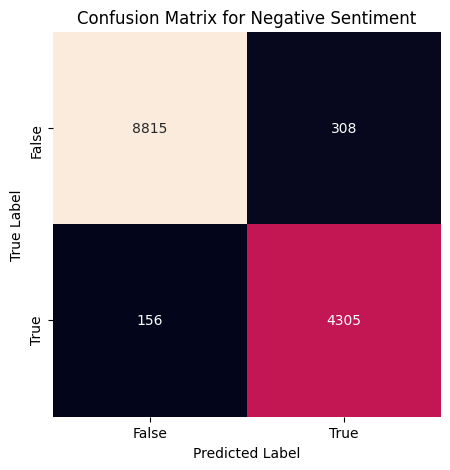

Score for Negative Sentiment:
Accuracy: 0.97
Precision: 0.93
Recall: 0.97
f1 score: 0.95 



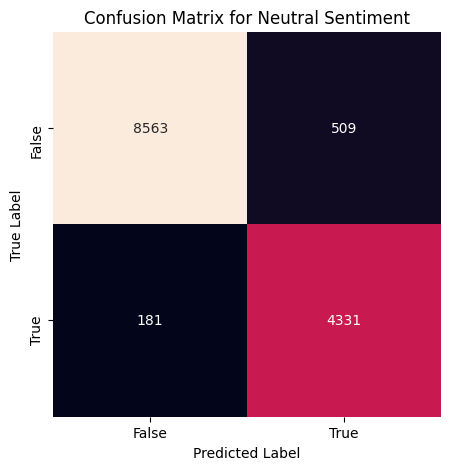

Score for Neutral Sentiment:
Accuracy: 0.95
Precision: 0.89
Recall: 0.96
f1 score: 0.93 



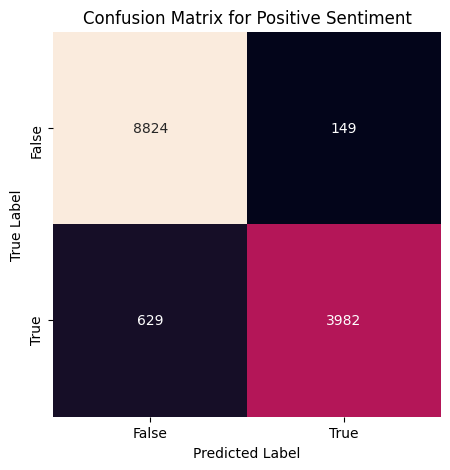

Score for Positive Sentiment:
Accuracy: 0.94
Precision: 0.96
Recall: 0.86
f1 score: 0.91 



In [42]:
class_names = ['Negative', 'Neutral', 'Positive']

for i, class_name in enumerate(class_names):
    y_test_binary = np.where(y_test == i, 1, 0)
    y_pred_binary = np.where(y_pred_classes == i, 1, 0)

    cm = confusion_matrix(y_test_binary, y_pred_binary)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False,
                xticklabels=['False','True'],
                yticklabels=['False','True'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {class_name} Sentiment')
    plt.show()
    
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)
    print(f'Score for {class_name} Sentiment:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'f1 score: {f1:.2f} \n')

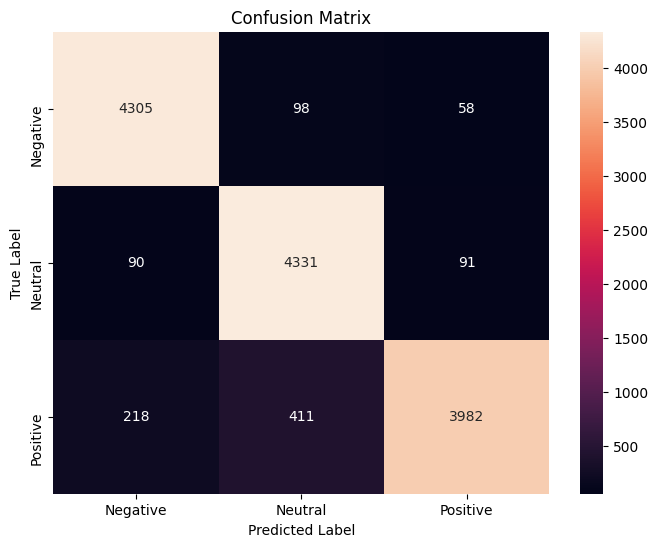

              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95      4461
     Neutral       0.89      0.96      0.93      4512
    Positive       0.96      0.86      0.91      4611

    accuracy                           0.93     13584
   macro avg       0.93      0.93      0.93     13584
weighted avg       0.93      0.93      0.93     13584



In [43]:
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Laporan klasifikasi
print(classification_report(y_test, y_pred_classes, target_names=class_names))

#### ROC Curve and Precision-Recall Curve

In [44]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [45]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

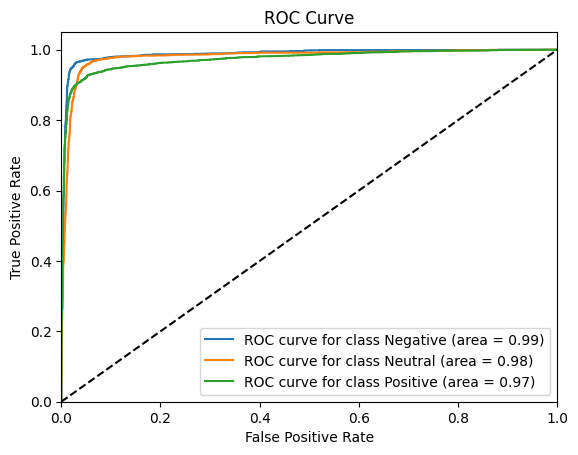

In [46]:
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for class {class_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

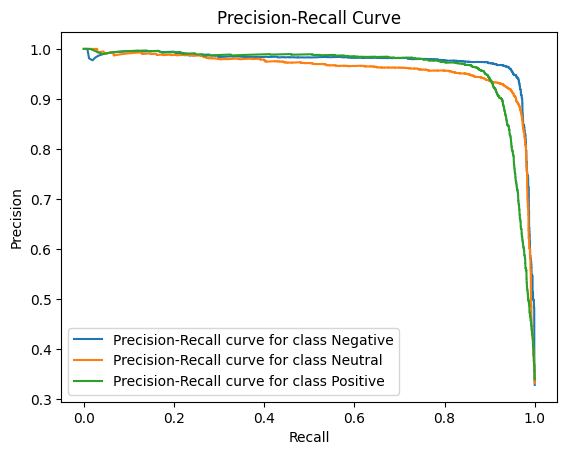

In [47]:
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve for class {class_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()